<a href="https://colab.research.google.com/github/kaiju8/GANs-Implemented/blob/main/GANs_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

from torch.utils.data import DataLoader

import numpy as np

import matplotlib.pyplot as plt

In [2]:
class Discriminator(nn.Module):
  def __init__(self, img_dim):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(img_dim, 128),
        nn.LeakyReLU(0.1),
        nn.Linear(128, 1),
        nn.Sigmoid(),
    )
  def forward(self, x):
    return self.disc(x)

class Generator(nn.Module):
  def __init__(self, z_dim, img_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.LeakyReLU(0.1),
        nn.Linear(256, img_dim),
        nn.Tanh(), 
    )
  def forward(self, x):
    return self.gen(x)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

GANs are very sensitive to hyperparameters

In [4]:
lr = 3e-4 #vary 
z_dim = 64 #vary
img_dim = 28 * 28 * 1
batch_size = 64
num_epochs = 100

In [5]:
disc = Discriminator(img_dim).to(device)
gen = Generator(z_dim, img_dim).to(device)

In [6]:
train_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]
)
dataset = datasets.MNIST(root = "dataset", transform = train_transforms, download = True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [7]:
opt_disc = optim.Adam(disc.parameters(), lr = lr)
opt_gen = optim.Adam(gen.parameters(), lr = lr)

In [8]:
criterion = nn.BCELoss()

In [9]:
def show(imgs): #Show function from pytorch.org
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [10]:
fixed_noise = torch.randn((batch_size, z_dim)).to(device) #For per epoch visualisation

Epoch [0/100] Batch 0/938 \Loss D: 0.6394, loss G: 0.7167
Epoch [1/100] Batch 0/938 \Loss D: 0.4786, loss G: 1.0550
Epoch [2/100] Batch 0/938 \Loss D: 0.6391, loss G: 0.8545
Epoch [3/100] Batch 0/938 \Loss D: 0.4229, loss G: 1.2091
Epoch [4/100] Batch 0/938 \Loss D: 0.5101, loss G: 1.0966
Epoch [5/100] Batch 0/938 \Loss D: 0.3639, loss G: 1.4757
Epoch [6/100] Batch 0/938 \Loss D: 0.4920, loss G: 1.1682
Epoch [7/100] Batch 0/938 \Loss D: 0.3784, loss G: 1.5737
Epoch [8/100] Batch 0/938 \Loss D: 0.5618, loss G: 1.0936
Epoch [9/100] Batch 0/938 \Loss D: 0.6278, loss G: 1.1034
Epoch [10/100] Batch 0/938 \Loss D: 0.6339, loss G: 1.0689
Epoch [11/100] Batch 0/938 \Loss D: 0.5236, loss G: 1.0316
Epoch [12/100] Batch 0/938 \Loss D: 0.4453, loss G: 1.3358
Epoch [13/100] Batch 0/938 \Loss D: 0.5709, loss G: 1.1899
Epoch [14/100] Batch 0/938 \Loss D: 0.6565, loss G: 0.8748
Epoch [15/100] Batch 0/938 \Loss D: 0.5700, loss G: 1.3324
Epoch [16/100] Batch 0/938 \Loss D: 0.5511, loss G: 1.3475
Epoch [

<ipython-input-9-b7bad29484c8>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)


Epoch [21/100] Batch 0/938 \Loss D: 0.5130, loss G: 1.1461
Epoch [22/100] Batch 0/938 \Loss D: 0.4038, loss G: 1.4674
Epoch [23/100] Batch 0/938 \Loss D: 0.7109, loss G: 0.9029
Epoch [24/100] Batch 0/938 \Loss D: 0.6002, loss G: 1.4001
Epoch [25/100] Batch 0/938 \Loss D: 0.4387, loss G: 1.1123
Epoch [26/100] Batch 0/938 \Loss D: 0.6522, loss G: 1.0504
Epoch [27/100] Batch 0/938 \Loss D: 0.5896, loss G: 1.0021
Epoch [28/100] Batch 0/938 \Loss D: 0.4316, loss G: 1.3208
Epoch [29/100] Batch 0/938 \Loss D: 0.5016, loss G: 1.3889
Epoch [30/100] Batch 0/938 \Loss D: 0.6516, loss G: 1.1232
Epoch [31/100] Batch 0/938 \Loss D: 0.4347, loss G: 1.5425
Epoch [32/100] Batch 0/938 \Loss D: 0.4944, loss G: 1.4668
Epoch [33/100] Batch 0/938 \Loss D: 0.3610, loss G: 1.5726
Epoch [34/100] Batch 0/938 \Loss D: 0.5216, loss G: 1.6044
Epoch [35/100] Batch 0/938 \Loss D: 0.7085, loss G: 1.0314
Epoch [36/100] Batch 0/938 \Loss D: 0.5934, loss G: 1.1987
Epoch [37/100] Batch 0/938 \Loss D: 0.5338, loss G: 1.38

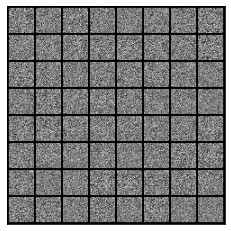

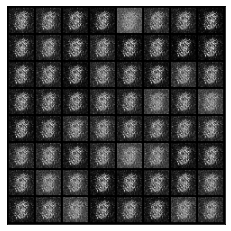

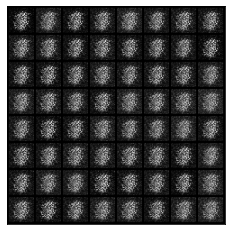

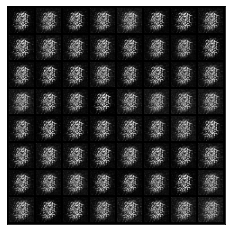

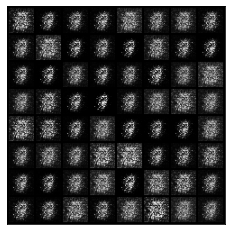

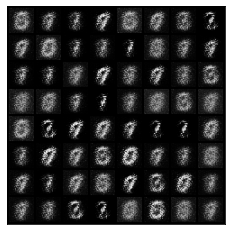

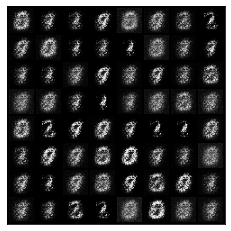

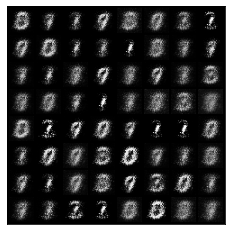

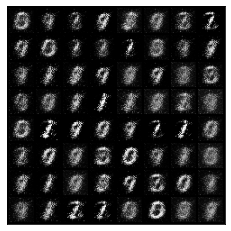

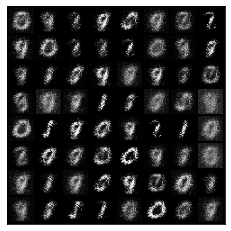

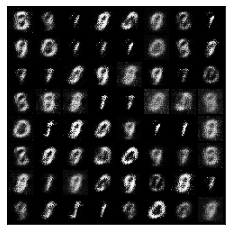

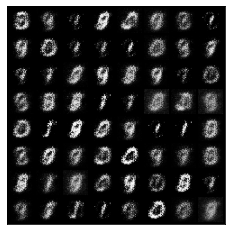

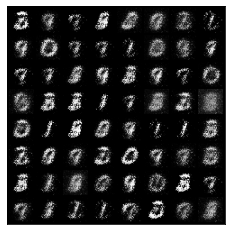

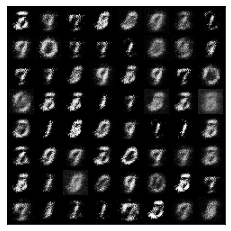

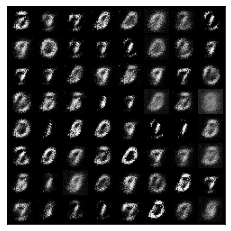

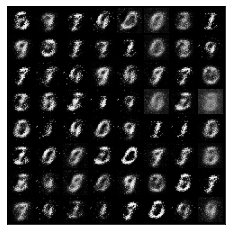

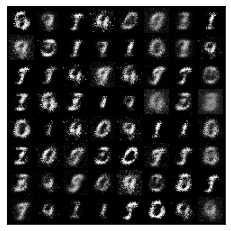

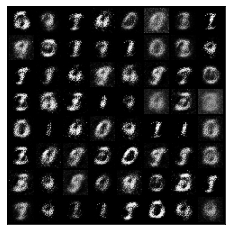

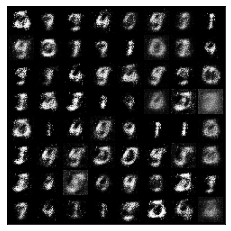

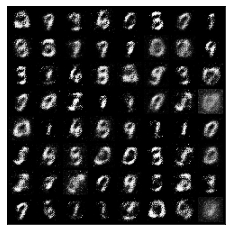

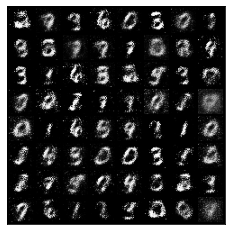

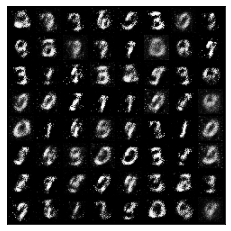

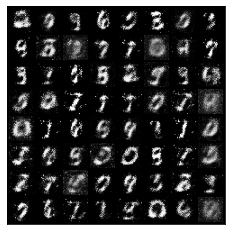

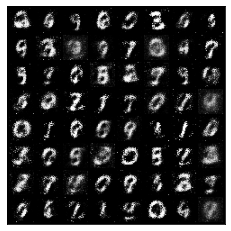

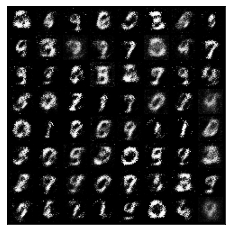

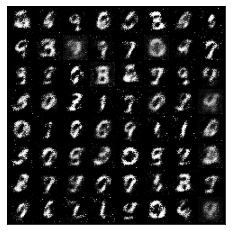

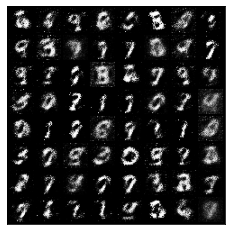

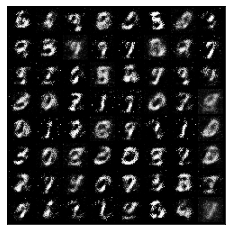

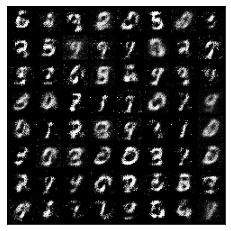

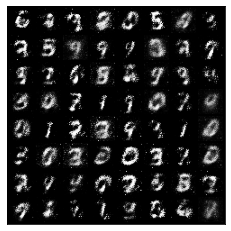

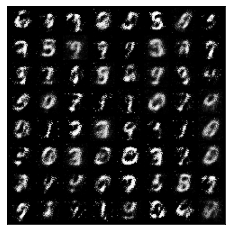

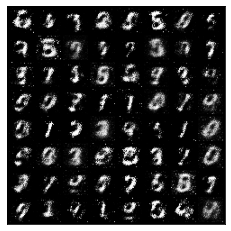

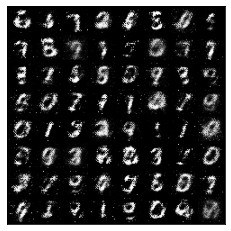

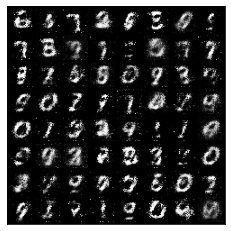

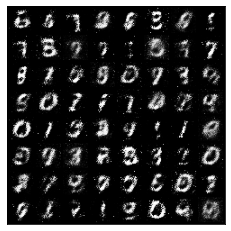

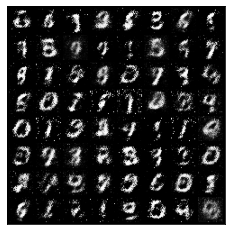

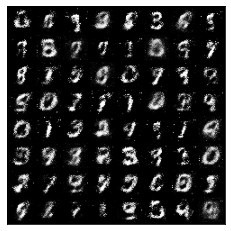

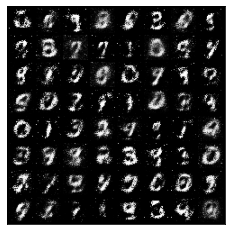

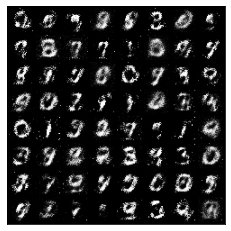

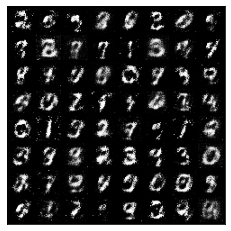

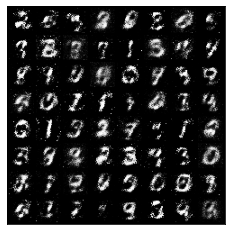

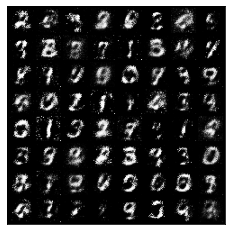

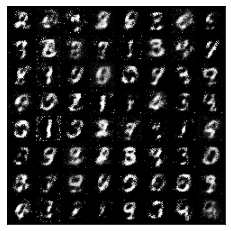

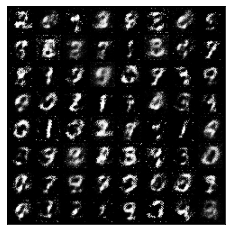

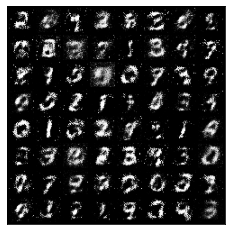

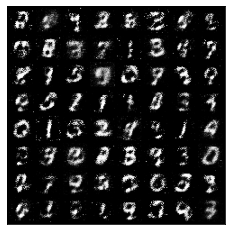

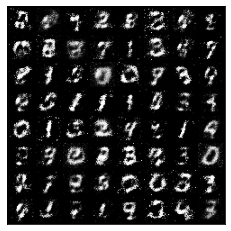

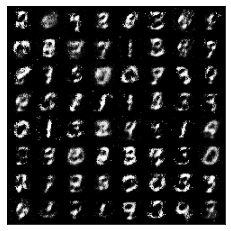

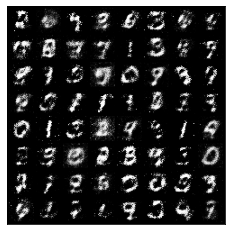

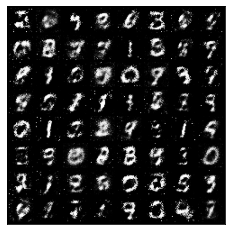

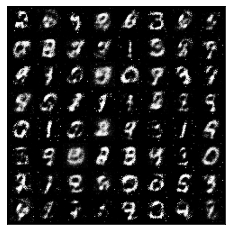

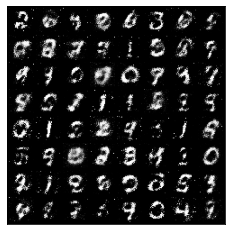

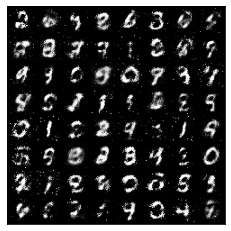

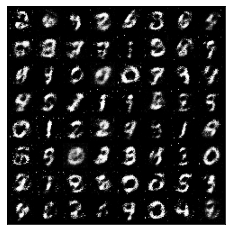

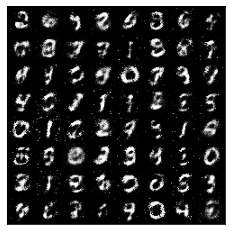

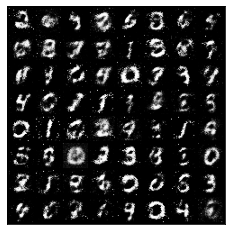

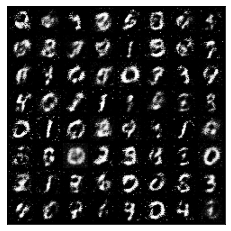

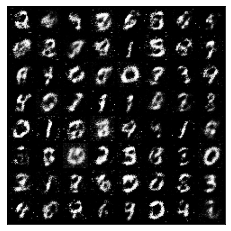

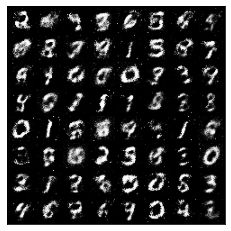

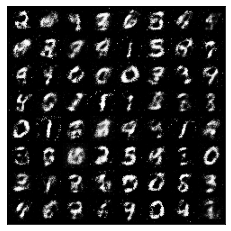

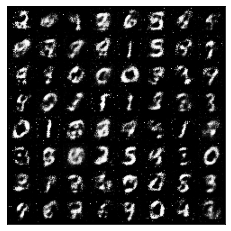

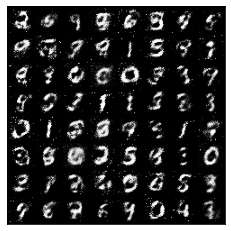

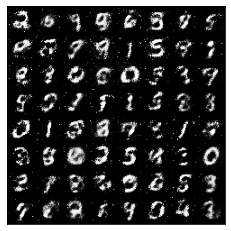

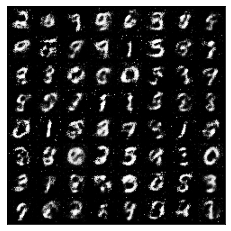

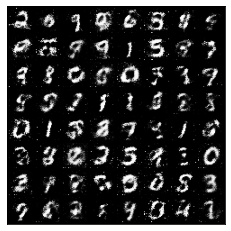

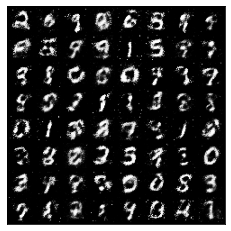

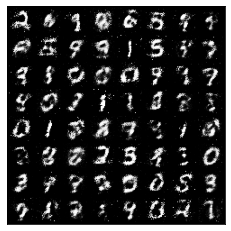

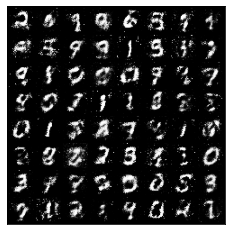

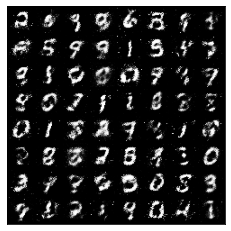

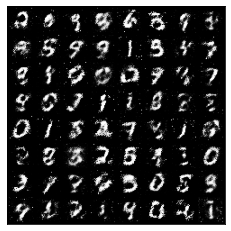

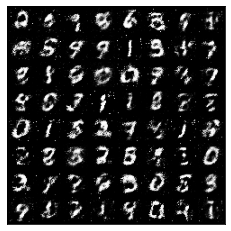

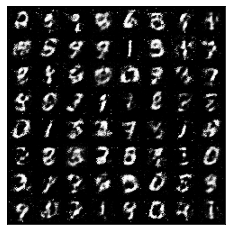

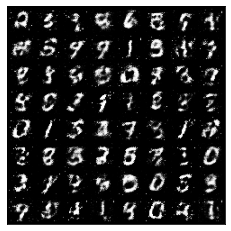

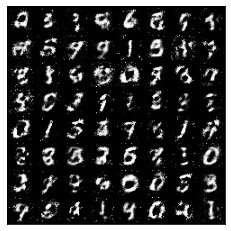

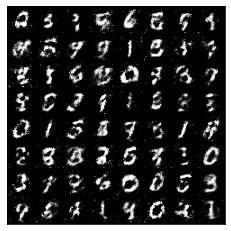

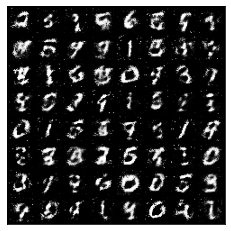

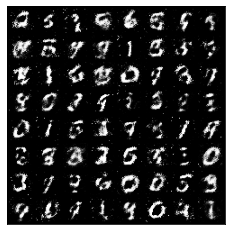

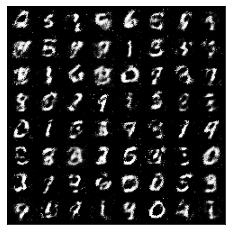

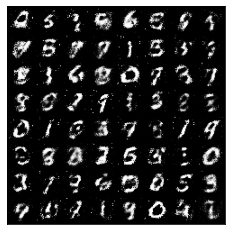

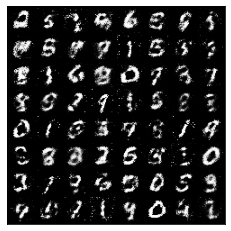

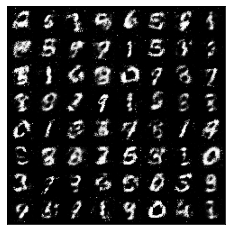

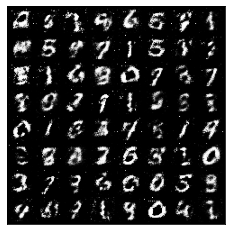

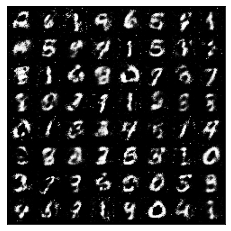

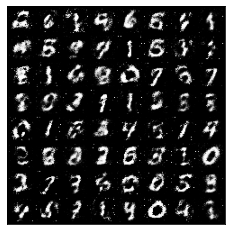

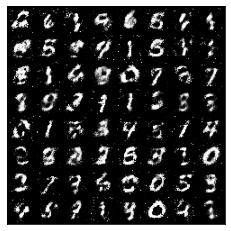

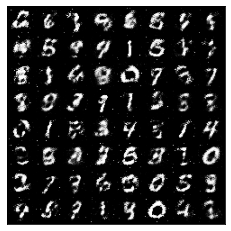

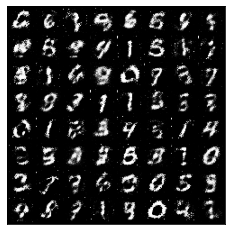

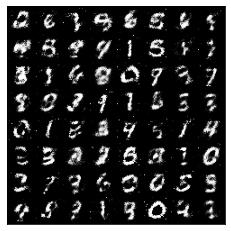

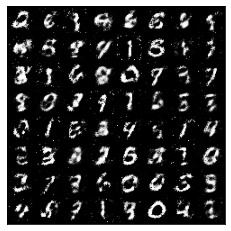

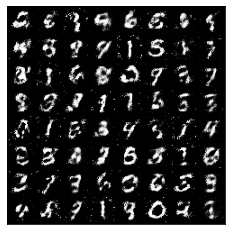

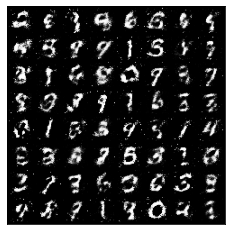

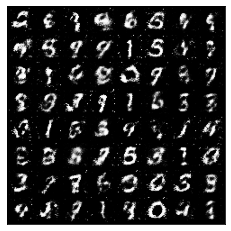

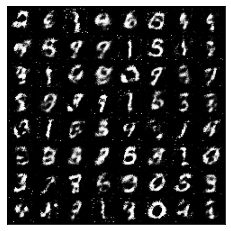

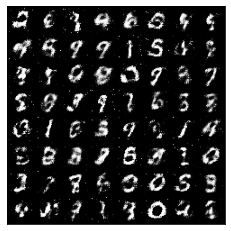

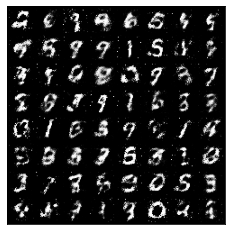

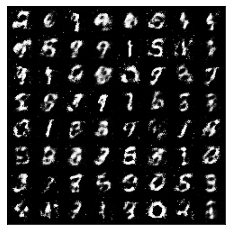

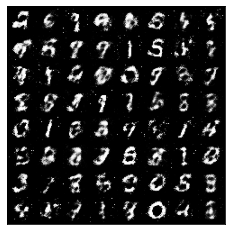

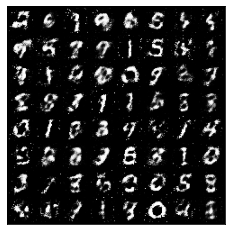

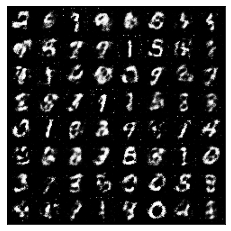

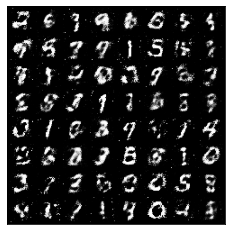

In [11]:
for epoch in range(num_epochs):
  for batch_idx, (real, _) in enumerate(loader):
    real = real.view(-1, 784).to(device)
    batch_Size = real.shape[0]

    #Discriminator max log(D(real)) + log(1 - D(G(z)))

    noise = torch.randn((batch_size, z_dim)).to(device)
    fake = gen(noise)

    disc_real = disc(real).view(-1)
    loss_real = criterion(disc_real, torch.ones_like(disc_real))

    disc_fake = disc(fake).view(-1)# detach for generator stuff or a
    loss_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

    loss_D = (loss_real + loss_fake)/2

    disc.zero_grad()
    loss_D.backward(retain_graph = True)# a
    opt_disc.step()

    #Discriminator min log(1 - D(G(z))) but better to max log(D(G(z)))

    output = disc(fake).view(-1)
    loss_G = criterion(output, torch.ones_like(output))

    gen.zero_grad()
    loss_G.backward(retain_graph = True)# a
    opt_gen.step()


###################################################
    if batch_idx == 0:
            print(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \Loss D: {loss_D:.4f}, loss G: {loss_G:.4f}")

            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                show(img_grid_fake)
####################################################